# Betrachtung des Zusammenhangs zwischen den einzelnen Dimensionen des Würfels und der Laufzeit

Von: Felix Schulze Sindern

Dieses Notebook ist Grundlage für das Kapitel 3.3 "Untersuchung Faktor Quadergröße (Felix Schulze Sindern)".
Es soll untersucht werden, ob jede Dimension des Quaders den gleichen Einfluss auf die Laufzeit hat.


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
initial_data = pd.read_csv('../individual_cuboid_sizes_measurements.csv')

## Fragestellung 1: Hat jede Dimension des Quaders den gleichen Einfluss auf die Laufzeit?

In [18]:
data1 = initial_data
values = data1.apply(list(filter(lambda x: x.isdigit(), data1.columns)), axis=1)
data1['avg'] = values.mean(axis=1)
data1 = data1.drop(list(filter(lambda x: x.isdigit(), data1.columns)), axis=1)

grouped_by_length = data1.groupby('length').mean().reset_index()
grouped_by_width = data1.groupby('width').mean().reset_index()
grouped_by_height = data1.groupby('height').mean().reset_index()
grouped_by_height

,height,length,width,avg
0,100,233.333333,233.333333,3314.819444
1,200,233.333333,233.333333,9609.302083
2,400,233.333333,233.333333,24150.347222


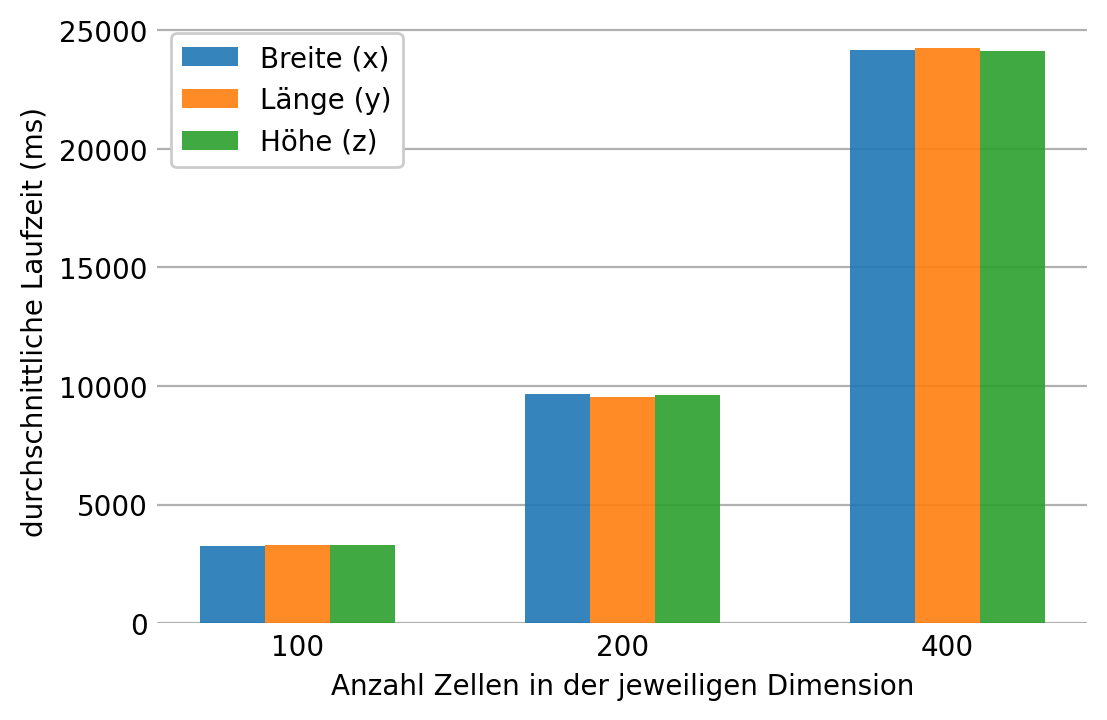

In [19]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)

x = np.arange(len(grouped_by_height.height))
width = 0.2  # the width of the bars

width_rect = ax.bar(x - width, grouped_by_width.avg, width, label='Breite (x)', zorder=100, alpha=0.9)
height_rect = ax.bar(x, grouped_by_length.avg, width, label='Länge (y)', zorder=100, alpha=0.9)
length_rect = ax.bar(x + width, grouped_by_height.avg, width, label='Höhe (z)', zorder=100, alpha=0.9)
ax.legend(framealpha=1)

ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl Zellen in der jeweiligen Dimension')
ax.set_xticks(x, grouped_by_height.height)

ax.tick_params(length=0)
ax.grid(axis='y', zorder=1)

grid_color= ax.get_xgridlines()[0].get_color()
# ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_visible(False)

In [20]:
fig.savefig('individual_cuboid_sizes.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')